Part 1: Data Cleaning And Pre-Processing

Problem 1

In [1]:
!pip install --upgrade openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.1.2
    Uninstalling openpyxl-3.1.2:
      Successfully uninstalled openpyxl-3.1.2


In [3]:
import pandas as pd
import numpy as np

In [13]:
df1 = pd.read_excel("Glass_Identification_Data-1.xlsx") 
df1.head()

,ID,RI,Na,Mg,Al,Si,K,CA,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,NaN,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,NaN,0.0,1
2,3,NaN,13.53,3.55,1.54,72.99,0.39,7.78,NaN,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,NaN,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,NaN,0.0,1


TODO1:

In [17]:
missing_percentage = df1.isnull().sum() / len(df1) * 100
print("Percentage of missing values:\n", missing_percentage)
df1 = df1.loc[:, missing_percentage <= 75]

Percentage of missing values:
 ID       0.000000
RI       0.934579
Na       0.934579
Mg       7.943925
Al       0.000000
Si       0.467290
K        2.336449
CA       0.000000
Fe       0.000000
Class    0.000000
dtype: float64


TODO2:

In [43]:
for col in df1.columns:
    if df1[col].isnull().sum() > 10:
        # Fill missing values with the mean of the respective class
        df1[col] = df1.groupby("Class")[col].transform(lambda x: x.fillna(x.mean()))
    else:
        # Forward fill missing values for each group
        df1[col] = df1.groupby("Class")[col].ffill()

TODO3:

In [39]:
print("Missing values after imputation:\n", df1.isnull().sum())


Missing values after imputation:
 ID       0
RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
CA       0
Fe       0
Class    0
dtype: int64


TODO4:

In [41]:
desc_stats = df1.groupby("Class").describe()
print(desc_stats)

         ID                                                           RI  \
      count   mean        std    min     25%    50%     75%    max count   
Class                                                                      
1      70.0   35.5  20.351085    1.0   18.25   35.5   52.75   70.0  70.0   
2      76.0  108.5  22.083176   71.0   89.75  108.5  127.25  146.0  76.0   
3      17.0  155.0   5.049752  147.0  151.00  155.0  159.00  163.0  17.0   
5      13.0  170.0   3.894440  164.0  167.00  170.0  173.00  176.0  13.0   
6       9.0  181.0   2.738613  177.0  179.00  181.0  183.00  185.0   9.0   
7      29.0  200.0   8.514693  186.0  193.00  200.0  207.00  214.0  29.0   

                 ...       CA           Fe                                     \
           mean  ...      75%    max count      mean       std  min  25%  50%   
Class            ...                                                            
1      1.518739  ...   9.0525  10.17  70.0  0.057000  0.089075  0.0  0.0

Problem 2

In [45]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


TODO1:

In [49]:
mean_age = titanic[titanic['survived'] == 1].groupby('sex')['age'].mean()
print("Mean age of survivors by gender:\n", mean_age)

Mean age of survivors by gender:
 sex
female    28.847716
male      27.276022
Name: age, dtype: float64


TODO2:

In [51]:
gender_dist = titanic[titanic['survived'] == 1].pivot_table(index='sex', values='survived', aggfunc='count') / len(titanic[titanic['survived'] == 1]) * 100
print("Gender distribution among survivors:\n", gender_dist)

Gender distribution among survivors:
          survived
sex              
female  68.128655
male    31.871345


TODO3: 

In [53]:
children = titanic[(titanic['age'] <= 12) & (titanic['survived'] == 1)]
children_by_class = children.groupby('pclass')['survived'].count()
print("Children who survived by ticket class:\n", children_by_class)

Children who survived by ticket class:
 pclass
1     3
2    17
3    20
Name: survived, dtype: int64


TODO4:

In [55]:
non_surviving_girls = titanic[(titanic['age'] <= 12) & (titanic['sex'] == 'female') & (titanic['pclass'] == 1) & (titanic['survived'] == 0)]
print("Non-surviving first-class seated girls:\n", len(non_surviving_girls))

Non-surviving first-class seated girls:
 1


TODO5:

In [57]:
titanic = titanic.drop(['alive'], axis=1)
print("Updated Titanic dataset:\n", titanic.head())

Updated Titanic dataset:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town  alone  
0    man        True  NaN  Southampton  False  
1  woman       False    C    Cherbourg  False  
2  woman       False  NaN  Southampton   True  
3  woman       False    C  Southampton  False  
4    man        True  NaN  Southampton   True  


TODO6:

In [61]:
pivot = titanic.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean', observed=False)
print("Survival rate by class and gender:\n", pivot)

Survival rate by class and gender:
 sex       female      male
class                     
First   0.968085  0.368852
Second  0.921053  0.157407
Third   0.500000  0.135447


Part 2: Data Visualization

Problem 3

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
df2= pd.read_csv("forestfires-1.csv") 
df2.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


TODO1:

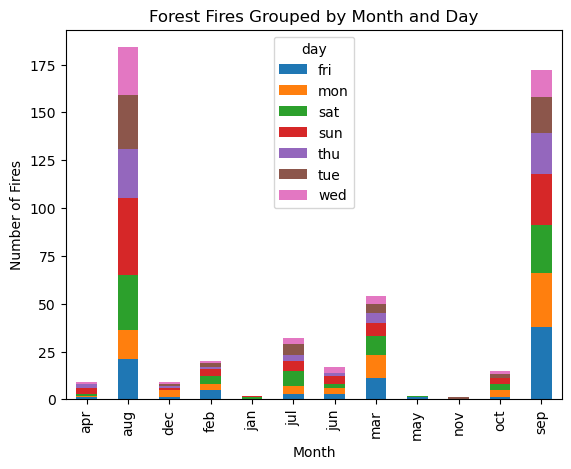

In [67]:
month_day_counts = df2.groupby(['month', 'day']).size().unstack()
month_day_counts.plot(kind='bar', stacked=True)
plt.title("Forest Fires Grouped by Month and Day")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.show()

TODO2:

-> The Stacked Bar Chart's Drawbacks

* Order of Months: The bar chart will show months in alphabetical order if the month column is not arranged chronologically (January to December, for example), which is counterintuitive for time-based data.
* Cluttered Visualization: The chart may appear excessively cluttered and challenging to understand if there are too many distinct days or sections.
* Insufficient Clarity: It could be challenging to decipher what the chart depicts in the absence of appropriate labels, legends, or titles.
* Uneven Distribution: It may be difficult to compare smaller categories when some months or days predominate the chart.


-> Solutions:

1. Months are arranged chronologically:

* Convert the month column to a categorical type and make sure it is arranged correctly (January through December)

In [99]:
import pandas as pd
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df2['month'] = pd.Categorical(df2['month'], categories=month_order, ordered=True)
df2 = df2.sort_values('month')

2. Make the Data Simpler:

* If the specifics of each day are not important, group days into more general groups, such as weekdays vs weekends.
To cut down on visual clutter, use fewer colors or merge smaller groups.


3. Add Labels and Titles: Ensure the chart includes:

* A title to describe the chart.
* Properly labeled axes.
* A legend to clarify the color scheme.

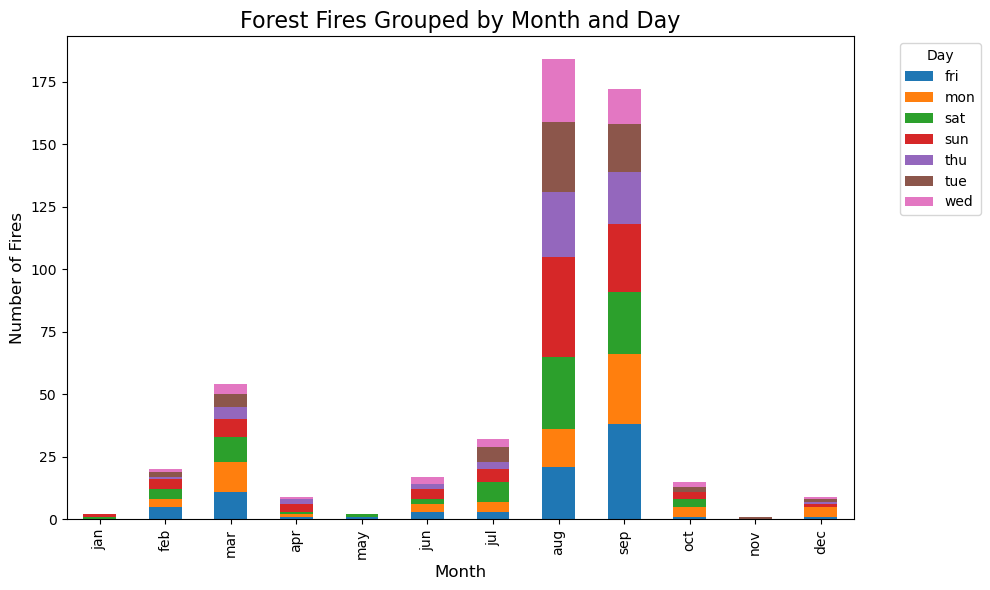

In [108]:
import matplotlib.pyplot as plt

month_day_counts = df2.groupby(['month', 'day'], observed=False).size().unstack()
month_day_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Forest Fires Grouped by Month and Day", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Fires", fontsize=12)
plt.legend(title="Day", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


4. Consider Alternative Visualizations:

* To visualize trends, use a line chart or heatmap rather than a stacked bar chart. When displaying data trends across two dimensions (such as days and months), heatmaps work very well.


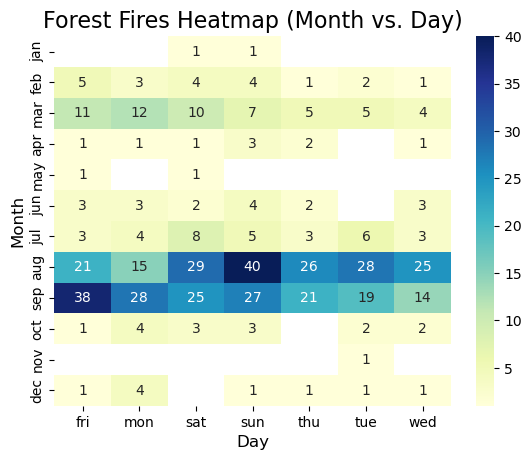

In [116]:
import seaborn as sns

heatmap_data = df2.groupby(['month', 'day'], observed=True).size().unstack()
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True)
plt.title("Forest Fires Heatmap (Month vs. Day)", fontsize=16)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Month", fontsize=12)
plt.show()

TODO3:

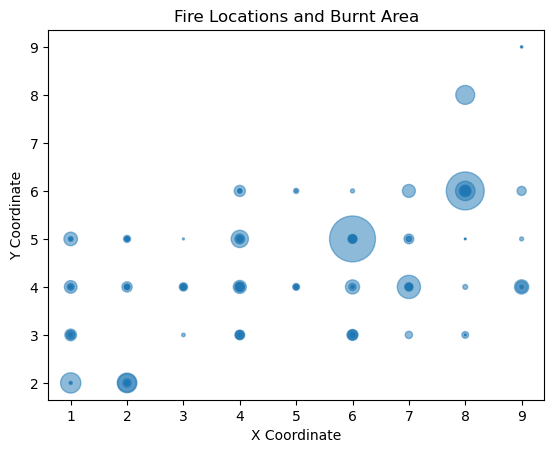

In [69]:
plt.scatter(df2['X'], df2['Y'], s=df2['area'], alpha=0.5)
plt.title("Fire Locations and Burnt Area")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

TODO4:

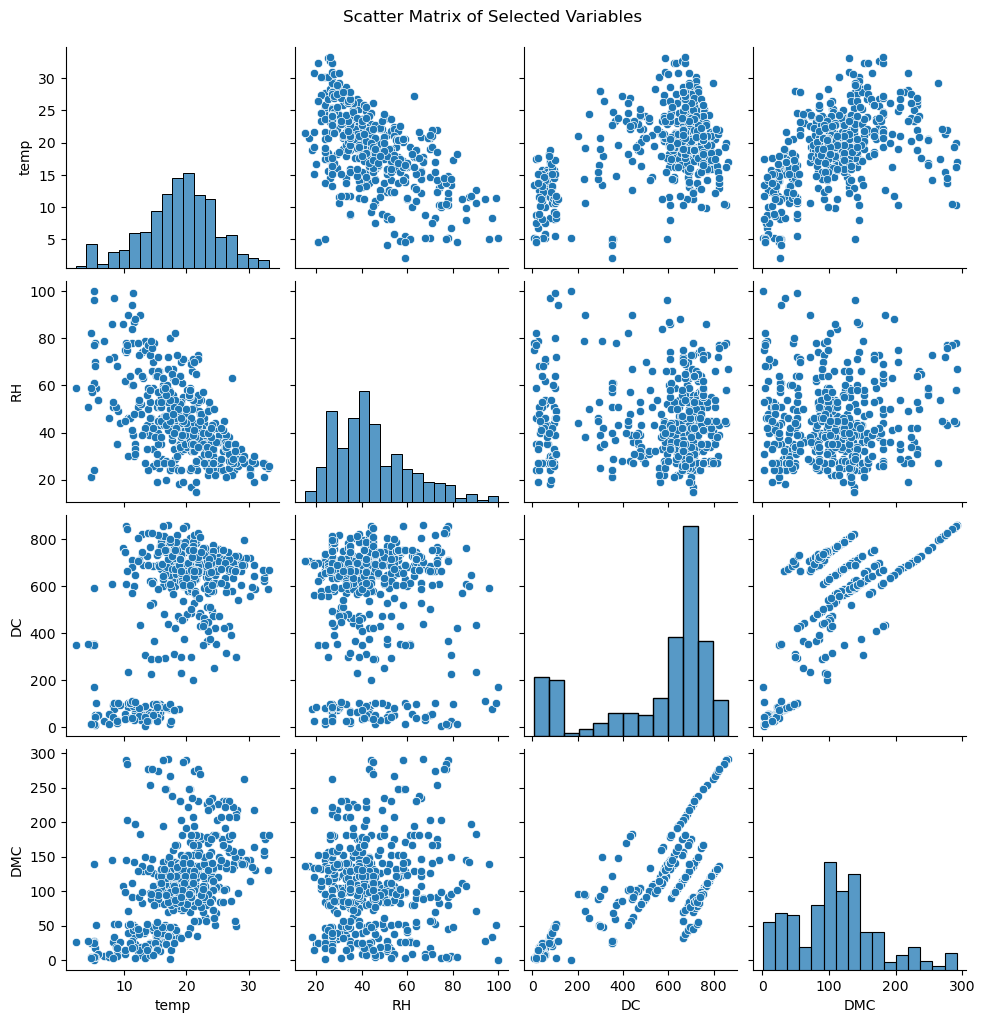

In [71]:
sns.pairplot(df2, vars=['temp', 'RH', 'DC', 'DMC'])
plt.suptitle("Scatter Matrix of Selected Variables", y=1.02)
plt.show()

TODO5: 

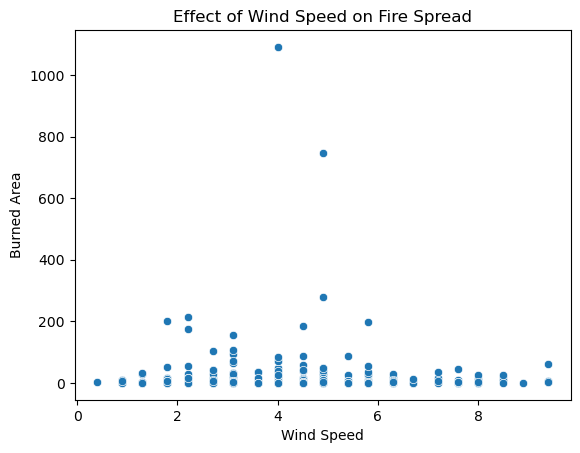

In [73]:
sns.scatterplot(x='wind', y='area', data=df2)
plt.title("Effect of Wind Speed on Fire Spread")
plt.xlabel("Wind Speed")
plt.ylabel("Burned Area")
plt.show()

Problem 4

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

df3 = pd.read_csv("Admission_Predict-1.csv")
df3.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,yes,0.92
1,2,324,107,4,4.0,4.5,8.87,yes,0.76
2,3,316,104,3,3.0,3.5,8.00,yes,0.72
3,4,322,110,3,3.5,2.5,8.67,yes,0.80
4,5,314,103,2,2.0,3.0,8.21,no,0.65


TODO1: 

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


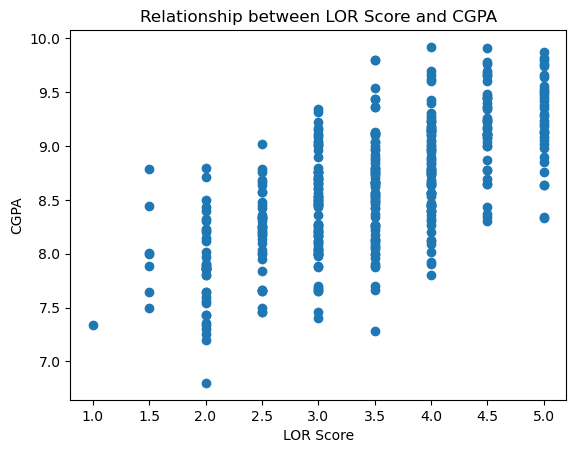

In [89]:
print(df3.columns)
df3.rename(columns={'LOR ': 'LOR'}, inplace=True)  
plt.scatter(df3['LOR'], df3['CGPA'])
plt.title("Relationship between LOR Score and CGPA")
plt.xlabel("LOR Score")
plt.ylabel("CGPA")
plt.show()


TODO2: 

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


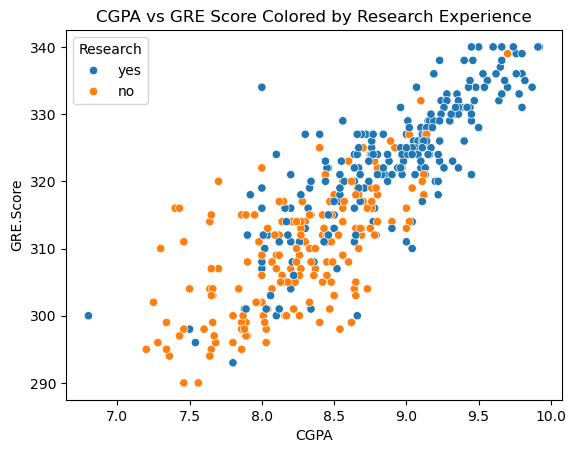

In [93]:
print(df3.columns)
df3.rename(columns={'GRE Score': 'GRE.Score'}, inplace=True)  # Example if the column is named 'GRE Score'
sns.scatterplot(x='CGPA', y='GRE.Score', hue='Research', data=df3)
plt.title("CGPA vs GRE Score Colored by Research Experience")
plt.show()

TODO3: 

Index(['Serial No.', 'GRE.Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


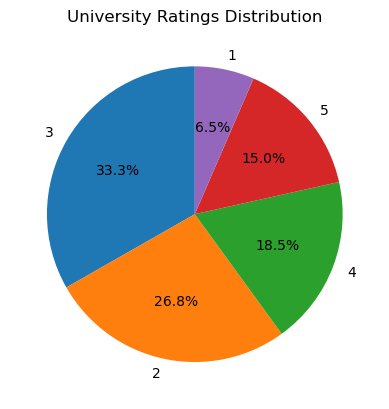

In [97]:
print(df3.columns)
df3.rename(columns={'University Rating': 'University.Rating'}, inplace=True)
rating_counts = df3['University.Rating'].value_counts()
rating_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("University Ratings Distribution")
plt.ylabel("")
plt.show()

TODO4:

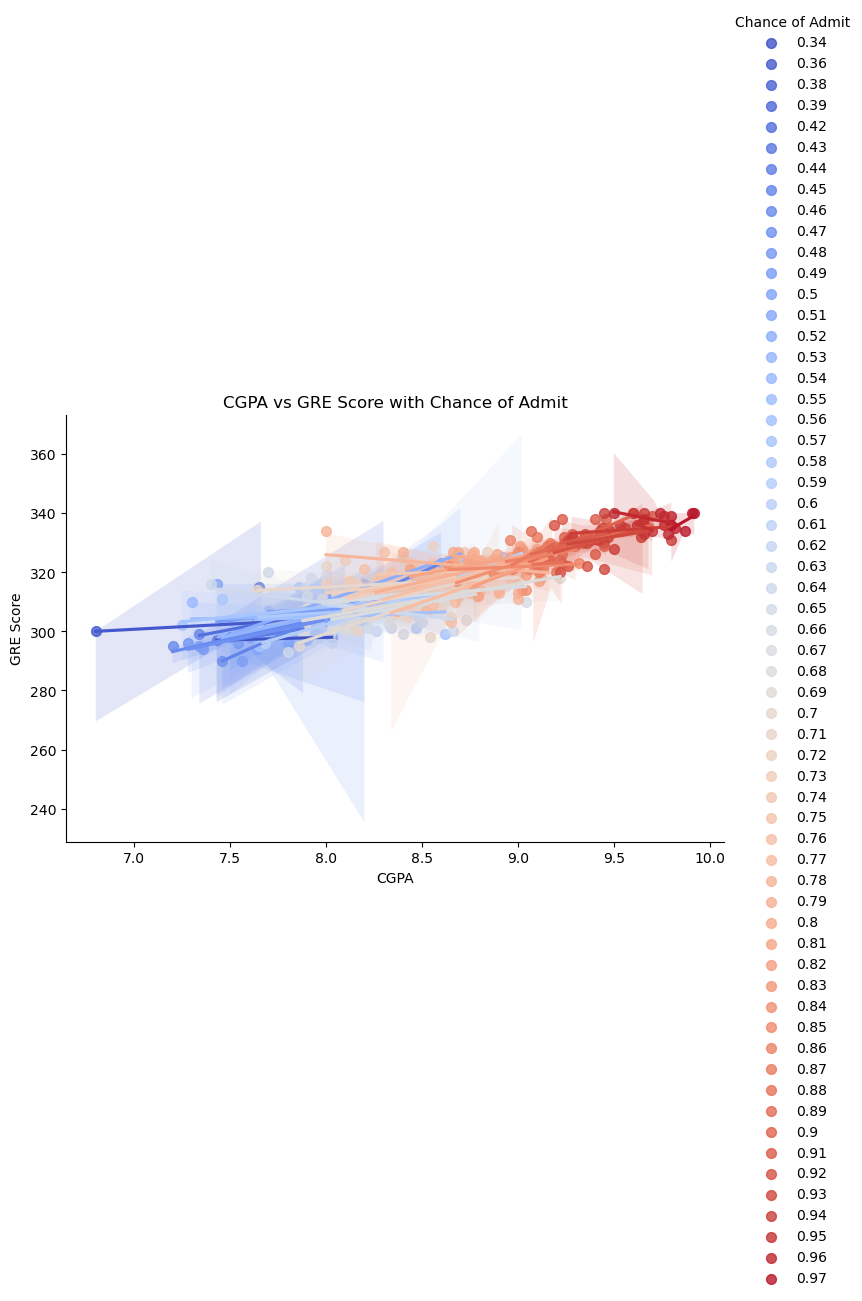

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='CGPA', y='GRE.Score', hue='Chance of Admit', data=df3, aspect=1.5, 
           markers="o", palette="coolwarm", scatter_kws={"s": 50})
plt.title("CGPA vs GRE Score with Chance of Admit")
plt.xlabel("CGPA")
plt.ylabel("GRE Score")
plt.show()